# Набор данных
Оценить какие признаки влияют на высокий доход людей (больше 50 тысяч в год) и низкий (меньше 50 тысяч в год)

Набор данных представляет собой набор различных признаков людей.

Источник данных: https://www.kaggle.com/datasets/lodetomasi1995/income-classification

# Import библиотек

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Набор данных

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/лаб3/income_evaluation.csv', delimiter=',')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Анализ признаков

In [ ]:
#Приведем названия столбцов к удобному виду
df.columns = df.columns.str.replace('-', '_').str.strip()

In [ ]:
#Уберем некоторые столбцы и уберем лишние пробелы в значениях
#age - возраст человека
#workclass - рабочий класс
df['workclass'] = df['workclass'].str.strip()
#fnlwgt - количество людей с такими признаками. Не нужен при анализе
df.drop(columns = ['fnlwgt'],axis = 1, inplace =True)
#education - уровень образования
df['education'] = df['education'].str.strip()
#education_num - не совсем понял. что значит данный признак, поэтому решил его убрать
df.drop(columns = ['education_num'],axis = 1, inplace =True)
#marital_status - статус брака
df['marital_status'] = df['marital_status'].str.strip()
#occupation - профессия
df['occupation'] = df['occupation'].str.strip()
#relationship - роль в отношениях
df['relationship'] = df['relationship'].str.strip()
#race - раса
df['race'] = df['race'].str.strip()
#sex - пол
df['sex'] = df['sex'].str.strip()
#capital_gain - накопленный капитал
#capital_loss - потерянный капитал
#hours_per_week - сколько часов работают в неделю
#native_country - страна, откуда человек
df['native_country'] = df['native_country'].str.strip()
#income - какой доход (>50000 в год или меньше)
df['income'] = df['income'].str.strip()

###Разберемся с типами данных

In [ ]:
#Все данные в нужных нам типах
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   marital_status  32561 non-null  object
 4   occupation      32561 non-null  object
 5   relationship    32561 non-null  object
 6   race            32561 non-null  object
 7   sex             32561 non-null  object
 8   capital_gain    32561 non-null  int64 
 9   capital_loss    32561 non-null  int64 
 10  hours_per_week  32561 non-null  int64 
 11  native_country  32561 non-null  object
 12  income          32561 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [ ]:
#Столбец income содержит значения '<=50K' и '>50K', предлагаю поменять названия
df['income'] = df['income'].str.replace('<=50K', 'low')
df['income'] = df['income'].str.replace('>50K', 'high')

In [ ]:
#Значения в столбце workclass имеют странные названия "?", предлагаю их удалить
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [ ]:
bad_workclass = df[(df.workclass == '?')]
df = df.drop(bad_workclass.index)

In [ ]:
#Такая же проблема есть в столбце native_country, тоже удалим
bad_native_country = df[(df.native_country == '?')]
df = df.drop(bad_native_country.index)

###Проверим df на наличие дубликатов и пропусков

In [ ]:
#Проверим наличие дубликатов
df.duplicated().sum()

3258

In [ ]:
#Очистим df от дубликатов
df = df.drop_duplicates()
df = df.reset_index(drop=True)

In [ ]:
#Проверим наличие пропусков
df.isnull().sum()

age               0
workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

###Рассмотрим категориальные и числовые столбцы

In [ ]:
cat_columns = []
num_columns = []
for i in df.columns:
    if (df[i].dtypes == object):
        cat_columns +=[i]
    else:
        num_columns +=[i]
print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))
print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))

Категориальные данные:	  ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income'] 
 Число столблцов =  9
Числовые данные:	  ['age', 'capital_gain', 'capital_loss', 'hours_per_week'] 
 Число столблцов =  4


## Рассмотрим основную статистику нашего df

In [ ]:
df.describe()

,age,capital_gain,capital_loss,hours_per_week
count,26911.000000,26911.000000,26911.000000,26911.000000
mean,39.044071,1215.081937,98.480175,41.161235
std,13.190480,7804.234209,425.626685,12.349008
min,17.000000,0.000000,0.000000,1.000000
25%,29.000000,0.000000,0.000000,40.000000
50%,38.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


Исходя из зрительного анализа уже можно заметить странные данные в столбцах:
1. слишком большой возраст для работающего
2. слишком большое количество часов в неделю
3. слишком маленькое количество часов в неделю

###Корреляция числовых признаков

In [ ]:
cm = sns.color_palette("coolwarm", as_cmap=True)
df[num_columns].corr().style.background_gradient(cmap=cm,
                                    vmin = -1,
                                    vmax=1)

,age,capital_gain,capital_loss,hours_per_week
age,1.000000,0.077274,0.052631,0.072908
capital_gain,0.077274,1.000000,-0.036026,0.079420
capital_loss,0.052631,-0.036026,1.000000,0.049100
hours_per_week,0.072908,0.079420,0.049100,1.000000


У нас нет взаимозависимых факторов

#Обработка числовых признаков

## Гистограмма распределений

In [ ]:
def plot_hist_plotly(df, col_names, rows = 2, cols = 2 ):
    fig = make_subplots(rows=2, cols=2,
                        subplot_titles= (col_names))
    for idx, column_name in enumerate(col_names):
        fig.add_trace(
            go.Histogram(x=df[column_name],
                nbinsx = 20),
        row=idx//2+1, col=idx%2+1)
    fig.update_layout(height=800, width=1000)
    fig.show()

In [ ]:
plot_hist_plotly(df, num_columns)

Столбцы имеют явные аномалии. Рассмотрим столбец capital_gain (накопленный капитал) и почистим df

In [ ]:
fig = px.scatter(df,
                 x='capital_gain',
                 log_x=True)
fig.show()

In [ ]:
#Удалим представителей возраста более 70 (там вроде как пенсия до 65-67 лет, но возьмем немного людей постарше, вдруг они решили немного поработать)
question_age = df[(df.age > 70)]
df = df.drop(question_age.index)

#Оставим накопленный капитал меньше 20 000 для тех кому меньше 40
question_capital = df[(df.age < 40) & (df.capital_gain > 20000)]
df = df.drop(question_capital.index)

#Оставим накопленный капитал больше 1000 для тех кому больше 40
question_capital = df[(df.age > 40) & (df.capital_gain < 1000)]
df = df.drop(question_capital.index)

#Оставим накопленный капитал меньше 90 000
question_capital = df[(df.capital_gain >= 90000)]
df = df.drop(question_capital.index)

#Оставим потерянный капитал меньше 2000 для тех кому меньше 40
question_capital = df[(df.age < 40) & (df.capital_loss > 2000)]
df = df.drop(question_capital.index)

#Оставим количество рабочих часов меньше 60 и больше 10 в неделю
question_hours = df[(df.hours_per_week > 60) | (df.hours_per_week < 10)]
df = df.drop(question_hours.index)

df = df.reset_index(drop=True)

## Итоговый результат

In [ ]:
plot_hist_plotly(df, num_columns)

Столбцы age и capital_gain имеют экспоненциальное распределение (посмотрим будет ли нормальное распределение при степенном преобразовании)

Столбец hours_per_week впринципе выглядит нормально

Столбец capital_loss надо посмотреть при разных обработках

In [ ]:
#Сохранение df для использования в других лабах
df.to_csv('/content/drive/MyDrive/datasets/лаб3/income_clean',index=False)

## Посмотрим степенное преобразование

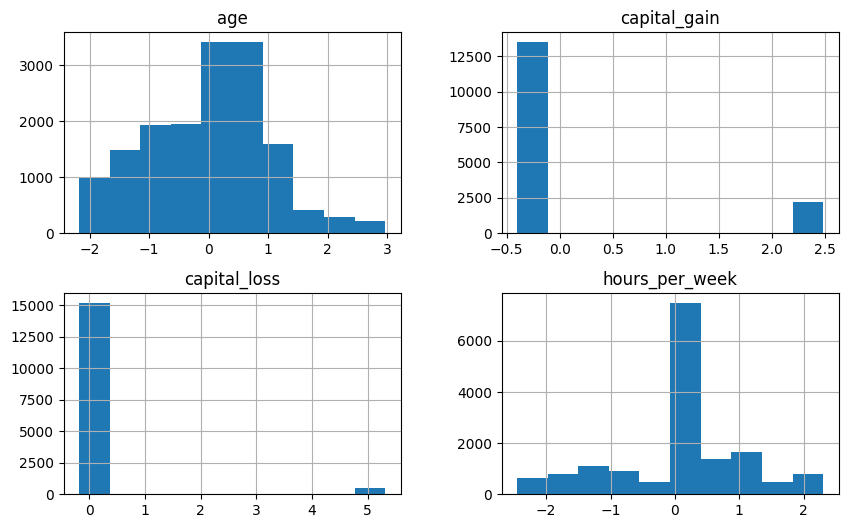

In [ ]:
#Обучаем и трансформируем
pt=PowerTransformer()
pt.fit(df[num_columns]);
power = pt.transform(df[num_columns])
df_power = pd.DataFrame(power, columns= num_columns)
#Визуализируем
df_power.hist(figsize = (10,6), layout= (2,2));

## Посмотрим стандартизацию

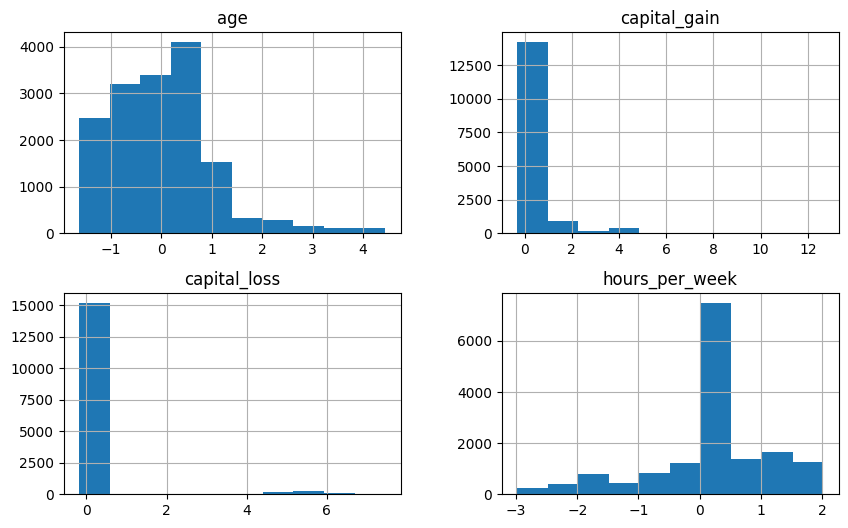

In [ ]:
#Обучаем и трансформируем
scale = StandardScaler()
scale.fit(df[num_columns]);
scaled = scale.transform(df[num_columns])
df_standard = pd.DataFrame(scaled, columns= num_columns)
#Визуализируем
df_standard.hist(figsize = (10,6), layout= (2,2));

# Pipeline

## Пропишем основные классы для работы с pipeline

In [ ]:
#Замена редких значений
class QuantileReplacer(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.05):
        self.threshold = threshold
        self.quantiles = {}

    def fit(self, X, y=None):
        for col in X.select_dtypes(include='number'):
            low_quantile = X[col].quantile(self.threshold)
            high_quantile = X[col].quantile(1 - self.threshold)
            self.quantiles[col] = (low_quantile, high_quantile)
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col in X.select_dtypes(include='number'):
            low_quantile, high_quantile = self.quantiles[col]
            rare_mask = ((X[col] < low_quantile) | (X[col] > high_quantile))
            if rare_mask.any():
                rare_values = X_copy.loc[rare_mask, col]
                replace_value = np.mean([low_quantile, high_quantile])
                if rare_values.mean() > replace_value:
                    X_copy.loc[rare_mask, col] = high_quantile
                else:
                    X_copy.loc[rare_mask, col] = low_quantile
        return X_copy

In [ ]:
#Замена редких категориальных данных
class RareGrouper(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.005, other_value='Other'):
        self.threshold = threshold
        self.other_value = other_value
        self.freq_dict = {}

    def fit(self, X, y=None):
        for col in X.select_dtypes(include=['object']):
            freq = X[col].value_counts(normalize=True)
            self.freq_dict[col] = freq[freq >= self.threshold].index.tolist()
        return self

    def transform(self, X, y=None):
        X_copy = X.copy()
        for col in X.select_dtypes(include=['object']):
            X_copy[col] = X_copy[col].apply(lambda x: x if x in self.freq_dict[col] else self.other_value)
        return X_copy

## Создадим pipline для всех признаков

In [ ]:
#Исходя из распределений в обработке решил выбрать степенное преобразование и стандартизацию.
#Также решил подрезать несколько редких значений в стобцах с капиталом
num_pipe_age = Pipeline([
    ('power', PowerTransformer())
])
num_age = ['age']

num_pipe_capital_gain = Pipeline([
    ('QuantReplace', QuantileReplacer(threshold=0.001, )),
    ('scaler', StandardScaler())
])
num_capital_gain = ['capital_gain']

num_pipe_capital_loss= Pipeline([
    ('QuantReplace', QuantileReplacer(threshold=0.001, )),
    ('scaler', StandardScaler())
])
num_capital_loss = ['capital_loss']

num_pipe_hours_per_week = Pipeline([
    ('power', PowerTransformer())
])
num_hours_per_week = ['hours_per_week']

In [ ]:
#Рассмотрим насколько многозначны наши признаки
df[cat_columns].nunique()

workclass          8
education         16
marital_status     7
occupation        15
relationship       6
race               5
sex                2
native_country    40
income             2
dtype: int64

In [ ]:
#Для категориальных решил использовать ohe, так как они немного многозначны. Столбец country решил немного подсократить в плане редких значений
cat_pipe_workclass = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_workclass = ['workclass']

cat_pipe_education = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_education = ['education']

cat_pipe_marital_status = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_marital_status = ['marital_status']

cat_pipe_occupation = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_occupation = ['occupation']

cat_pipe_relationship = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_relationship = ['relationship']

cat_pipe_race = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_race = ['race']

cat_pipe_sex = Pipeline([
    ('encoder', OrdinalEncoder())
])
cat_sex = ['sex']

cat_pipe_native_country = Pipeline([
    ('replace_rare', RareGrouper(threshold=0.001, other_value='Other')),
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])
cat_native_country = ['native_country']

cat_pipe_income = Pipeline([
    ('encoder', OrdinalEncoder())
])
cat_income = ['income']

In [ ]:
preprocessors = ColumnTransformer(transformers=[
    ('num_age', num_pipe_age, num_age),
    ('num_capital_gain', num_pipe_capital_gain, num_capital_gain),
    ('num_capital_loss', num_pipe_capital_loss, num_capital_loss),
    ('num_hours_per_week', num_pipe_hours_per_week, num_hours_per_week),
    ('cat_workclass', cat_pipe_workclass, cat_workclass),
    ('cat_education', cat_pipe_education, cat_education),
    ('cat_marital_status', cat_pipe_marital_status, cat_marital_status),
    ('cat_occupation', cat_pipe_occupation, cat_occupation),
    ('cat_relationship', cat_pipe_relationship, cat_relationship),
    ('cat_race', cat_pipe_race, cat_race),
    ('cat_sex', cat_pipe_sex, cat_sex),
    ('cat_native_country', cat_pipe_native_country, cat_native_country),
    ('cat_income', cat_pipe_income, cat_income)
])

In [ ]:
preprocessors.fit(df);

## Создадим pipeline отдельно для числовых признаков и общий pipeline

In [ ]:
preprocessors_num = ColumnTransformer(transformers=[
    ('num_age', num_pipe_age, num_age),
    ('num_capital_gain', num_pipe_capital_gain, num_capital_gain),
    ('num_capital_loss', num_pipe_capital_loss, num_capital_loss),
    ('num_hours_per_week', num_pipe_hours_per_week, num_hours_per_week)
])

preprocessors_all = ColumnTransformer(transformers=[
    ('num_age', num_pipe_age, num_age),
    ('num_capital_gain', num_pipe_capital_gain, num_capital_gain),
    ('num_capital_loss', num_pipe_capital_loss, num_capital_loss),
    ('num_hours_per_week', num_pipe_hours_per_week, num_hours_per_week),
    ('cat_workclass', cat_pipe_workclass, cat_workclass),
    ('cat_education', cat_pipe_education, cat_education),
    ('cat_marital_status', cat_pipe_marital_status, cat_marital_status),
    ('cat_occupation', cat_pipe_occupation, cat_occupation),
    ('cat_relationship', cat_pipe_relationship, cat_relationship),
    ('cat_race', cat_pipe_race, cat_race),
    ('cat_sex', cat_pipe_sex, cat_sex),
    ('cat_native_country', cat_pipe_native_country, cat_native_country)
])

In [ ]:
#Объединяем названия колонок в один список
columns_num = np.hstack([num_age,
                        num_capital_gain,
                        num_capital_loss,
                        num_hours_per_week
                        ])

# Логистическая Регрессия

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

## Работа с целевой переменной

In [ ]:
#Удаляем целевую переменную
X,y = df.drop(columns = ['income']), df['income']

In [ ]:
Label = LabelEncoder()
Label.fit(y)
Label.classes_

array(['high', 'low'], dtype=object)

0 высокий уровень дохода

1 это низкий уровень дохода

In [ ]:
target = Label.transform(y)

In [ ]:
#Разбиваем выборку на тренировочную и валидационную
X_train, X_val, y_train, y_val = train_test_split(X, target,
                                                    test_size=0.3,
                                                    random_state=42)

## Оценим модель с использованием только числовых данных

In [ ]:
#Сначала обучаем на тренировочных данных
X_train_prep = preprocessors_num.fit_transform(X_train)
#потом на валидационной
X_val_prep = preprocessors_num.transform(X_val)

In [ ]:
model = LogisticRegression(random_state = 42)
model.fit(X_train_prep, y_train);

### Подготовим несколько функций для анализа обученной модели

In [ ]:
def get_coefs (model):
    B0=model.intercept_[0]
    B=model.coef_[0]
    return B0, B

In [ ]:
def print_model (B0,B,features_names):
    line='{:.3f}'.format(B0)
    sign=['+','-']
    for p,(fn,b) in enumerate(zip(features_names,B)):
        line=line+sign[int(0.5*(np.sign(b)-1))]+'{:.2f}*'.format(np.abs(b))+fn
    print('Решение')
    print(line)

In [ ]:
def vis_weigths(weights,features_names = None, width = 1200, height = 600):
    numbers = np.arange(0,len(weights))
    if features_names:
        tick_labels = np.hstack(['B0',features_names])
    else:
        tick_labels = ['B'+str(num) for num in numbers]
    fig = go.Figure()
    fig.add_trace(go.Bar(x=numbers[weights<0], y=weights[weights<0],
                    marker_color='red',
                    name='отрицательные веса'))
    fig.add_trace(go.Bar(x=numbers[weights>=0], y=weights[weights>=0],
                    marker_color='blue',
                    name='положительные веса'
                    ))

    fig.update_layout(
                title="Веса модели",
                width=width,
                height=height,
                template = "plotly_dark",
                xaxis = dict(
                                         tickmode = 'array',
                                         tickvals = numbers,
                                         ticktext = tick_labels,
                                         )
                )

    fig.show()

### Уравнение модели

In [ ]:
B0, B = get_coefs(model)
features_names = list(columns_num)
print_model(B0,B,features_names)

Решение
1.741-0.79*age-1.04*capital_gain-0.33*capital_loss-0.58*hours_per_week


In [ ]:
#Отрисуем веса
Bs = np.hstack([B0,B])
vis_weigths(Bs,features_names)

Небольшой вывод: вероятность, что учеловека высокий доход растет в зависимости от роста наших числовых признаков

### Оценка метрик

In [ ]:
def calculate_metric(model_pipe, X, y, metric = f1_score):
    y_model = model_pipe.predict(X)
    return metric(y, y_model)

In [ ]:
print(f"f1 на тренировочной выборке: {calculate_metric(model, X_train_prep, y_train):.4f}")
print(f"f1 на валидационной выборке: {calculate_metric(model, X_val_prep, y_val):.4f}")

f1 на тренировочной выборке: 0.9130
f1 на валидационной выборке: 0.9087


In [ ]:
print(classification_report(y_val, model.predict(X_val_prep), target_names=Label.classes_))

              precision    recall  f1-score   support

        high       0.73      0.42      0.54       984
         low       0.86      0.96      0.91      3727

    accuracy                           0.85      4711
   macro avg       0.80      0.69      0.72      4711
weighted avg       0.84      0.85      0.83      4711



### Кросс-валидация

In [ ]:
def cross_validation (X, y, model, scoring, cv_rule):
    scores = cross_validate(model,X, y,
                      scoring=scoring, cv=cv_rule )
    print('Ошибка на кросс-валидации')
    DF_score = pd.DataFrame(scores)
    display(DF_score)
    print('\n')
    print(DF_score.mean()[2:])

In [ ]:
scoring_clf = {'ACC': 'accuracy',
           'F1': 'f1',
           'Precision': 'precision',
           'Recall': 'recall'}

In [ ]:
cross_validation (X_train_prep, y_train,
                  model,
                  scoring_clf,
                  StratifiedKFold(n_splits=5, shuffle= True, random_state = 42))

Ошибка на кросс-валидации


,fit_time,score_time,test_ACC,test_F1,test_Precision,test_Recall
0,0.037329,0.047015,0.857208,0.914301,0.868326,0.965418
1,0.037972,0.045189,0.850841,0.910334,0.865835,0.959654
2,0.033013,0.018682,0.852138,0.911613,0.863028,0.965994
3,0.031613,0.018805,0.860328,0.916734,0.865335,0.974625
4,0.025042,0.035193,0.850318,0.909986,0.865695,0.959054




test_ACC          0.854167
test_F1           0.912594
test_Precision    0.865644
test_Recall       0.964949
dtype: float64


Выводы по модели:
*   используя только 4 числовых признака можно с достаточно хорошо предсказывать какой доход у человека
*   модель выглядит "логично" т.к. с ростом данных признаков увеличивается вероятность того что перед нами человек с высоким доходом:
    *  Возраст (чем старше, тем больше опыт работы и знаний (по идее))
    *  Накопленный капитал (чем больше зарабатываешь, тем больше можешь отложить/накопить)
    *  Потерянный капитал (чем больше зарабатываешь, тем больше тратишь/теряешь)
    *  Количество рабочих часов в неделю (больше работаешь, больше получаешь)

Однако меня немного смущает низкий recall в classification_report у высокого дохода. Посмотрим, что будет, когда добавим категориальные данные

## Объединяем Pipeline Предобработки и Модель

In [ ]:
pipe_num = Pipeline([
    ('preprocessors', preprocessors_num),
    ('model', LogisticRegression(random_state = 42))
])

In [ ]:
pipe_num.fit(X_train, y_train)

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num_age',
                                                  Pipeline(steps=[('power',
                                                                   PowerTransformer())]),
                                                  ['age']),
                                                 ('num_capital_gain',
                                                  Pipeline(steps=[('QuantReplace',
                                                                   QuantileReplacer(threshold=0.001)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['capital_gain']),
                                                 ('num_capital_loss',
                                                  Pipeline(steps=[('QuantReplace',
                                                                   QuantileReplacer(threshold=0.001)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['capital_loss']),
                                                 ('num_hours_per_week',
                                                  Pipeline(steps=[('power',
                                                                   PowerTransformer())]),
                                                  ['hours_per_week'])])),
                ('model', LogisticRegression(random_state=42))])

### Уравнение модели

In [ ]:
B0, B = get_coefs(pipe_num['model'])
features_names = list(columns_num)

print_model (B0,B,features_names)

Решение
1.741-0.79*age-1.04*capital_gain-0.33*capital_loss-0.58*hours_per_week


### Оценка метрик

In [ ]:
print(f"f1 на тренировочной выборке: {calculate_metric(pipe_num, X_train, y_train):.4f}")
print(f"f1 на валидационной выборке: {calculate_metric(pipe_num, X_val, y_val):.4f}")

f1 на тренировочной выборке: 0.9130
f1 на валидационной выборке: 0.9087


In [ ]:
print(classification_report(y_val, pipe_num.predict(X_val), target_names=Label.classes_))

              precision    recall  f1-score   support

        high       0.73      0.42      0.54       984
         low       0.86      0.96      0.91      3727

    accuracy                           0.85      4711
   macro avg       0.80      0.69      0.72      4711
weighted avg       0.84      0.85      0.83      4711



### Кросс валидация

In [ ]:
cross_validation (X_train, y_train,
                  pipe_num,
                  scoring_clf,
                  StratifiedKFold(n_splits=5, shuffle= True, random_state = 42))

Ошибка на кросс-валидации


,fit_time,score_time,test_ACC,test_F1,test_Precision,test_Recall
0,0.130176,0.028006,0.857208,0.914301,0.868326,0.965418
1,0.120376,0.025511,0.850841,0.910334,0.865835,0.959654
2,0.144753,0.044761,0.852138,0.911613,0.863028,0.965994
3,0.129823,0.032439,0.860328,0.916734,0.865335,0.974625
4,0.117073,0.024460,0.850318,0.909986,0.865695,0.959054




test_ACC          0.854167
test_F1           0.912594
test_Precision    0.865644
test_Recall       0.964949
dtype: float64


## Оценим влияние категориальных признаков

In [ ]:
pipe_all = Pipeline([
    ('preprocessors', preprocessors_all),
    ('model', LogisticRegression(random_state = 42))
    ])

In [ ]:
pipe_all.fit(X_train, y_train)

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num_age',
                                                  Pipeline(steps=[('power',
                                                                   PowerTransformer())]),
                                                  ['age']),
                                                 ('num_capital_gain',
                                                  Pipeline(steps=[('QuantReplace',
                                                                   QuantileReplacer(threshold=0.001)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['capital_gain']),
                                                 ('num_capital_loss',
                                                  Pipeline(steps=[('QuantReplace',
                                                                   QuantileReplacer(threshold=0.00...
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['race']),
                                                 ('cat_sex',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder())]),
                                                  ['sex']),
                                                 ('cat_native_country',
                                                  Pipeline(steps=[('replace_rare',
                                                                   RareGrouper(threshold=0.001)),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['native_country'])])),
                ('model', LogisticRegression(random_state=42))])

In [ ]:
#Вытащим значения наших категориальных данных и объединим названия колонок в один список
cat_workclass_names = pipe_all['preprocessors'].transformers_[4][1]['encoder'].get_feature_names_out(cat_workclass)
cat_education_names = pipe_all['preprocessors'].transformers_[5][1]['encoder'].get_feature_names_out(cat_education)
cat_marital_status_names = pipe_all['preprocessors'].transformers_[6][1]['encoder'].get_feature_names_out(cat_marital_status)
cat_occupation_names = pipe_all['preprocessors'].transformers_[7][1]['encoder'].get_feature_names_out(cat_occupation)
cat_relationship_names = pipe_all['preprocessors'].transformers_[8][1]['encoder'].get_feature_names_out(cat_relationship)
cat_race_names = pipe_all['preprocessors'].transformers_[9][1]['encoder'].get_feature_names_out(cat_race)
cat_sex_names = pipe_all['preprocessors'].transformers_[10][1]['encoder'].get_feature_names_out(cat_sex)
cat_native_country_names = pipe_all['preprocessors'].transformers_[11][1]['encoder'].get_feature_names_out(cat_native_country)


columns = np.hstack([num_age,
                     num_capital_gain,
                     num_capital_loss,
                     num_hours_per_week,
                     cat_workclass_names,
                     cat_education_names,
                     cat_marital_status_names,
                     cat_occupation_names,
                     cat_relationship_names,
                     cat_race_names,
                     cat_sex_names,
                     cat_native_country_names
                     ])

### Уравнение модели

In [ ]:
B0, B = get_coefs(pipe_all['model'])
features_names = list(columns)

print_model (B0,B,features_names)

Решение
3.907-0.49*age-1.04*capital_gain-0.26*capital_loss-0.38*hours_per_week-0.60*workclass_Federal-gov+0.10*workclass_Local-gov+0.19*workclass_Never-worked-0.07*workclass_Private-0.19*workclass_Self-emp-inc+0.05*workclass_Self-emp-not-inc+0.37*workclass_State-gov+0.40*workclass_Without-pay+1.29*education_10th+0.37*education_11th+0.35*education_12th+1.01*education_1st-4th+0.16*education_5th-6th+1.51*education_7th-8th+1.49*education_9th-0.46*education_Assoc-acdm-0.41*education_Assoc-voc-1.02*education_Bachelors-1.10*education_Doctorate+0.06*education_HS-grad-1.40*education_Masters+0.38*education_Preschool-1.78*education_Prof-school-0.23*education_Some-college+0.37*marital_status_Divorced-1.26*marital_status_Married-AF-spouse-1.53*marital_status_Married-civ-spouse+1.08*marital_status_Married-spouse-absent+0.82*marital_status_Never-married+0.31*marital_status_Separated+0.45*marital_status_Widowed+0.19*occupation_?-0.06*occupation_Adm-clerical+0.44*occupation_Armed-Forces-0.05*occupation

In [ ]:
def vis_weigths_threshold(weights, feature_names, threshold, width = 1200, height = 600):
    mask = np.abs(weights) >= threshold
    weights_filtered = weights[mask]
    feature_names_filtered = [name for name, m in zip(feature_names, mask[1:]) if m]
    vis_weigths(weights_filtered,feature_names_filtered, width = width, height = height)

In [ ]:
#Отрисуем веса (взял threshold поменьше т.к. низкие значения у весов, и хотелось посмотреть побольше весов)
Bs = np.hstack([B0,B])
vis_weigths_threshold(Bs,columns, 0.7,  width = 1600)

### Оценка метрик

In [ ]:
print(f"f1 на тренировочной выборке: {calculate_metric(pipe_all, X_train, y_train):.4f}")
print(f"f1 на валидационной выборке: {calculate_metric(pipe_all, X_val, y_val):.4f}")

f1 на тренировочной выборке: 0.9290
f1 на валидационной выборке: 0.9249


In [ ]:
print(classification_report(y_val, pipe_all.predict(X_val), target_names=Label.classes_))

              precision    recall  f1-score   support

        high       0.75      0.62      0.68       984
         low       0.90      0.95      0.92      3727

    accuracy                           0.88      4711
   macro avg       0.83      0.78      0.80      4711
weighted avg       0.87      0.88      0.87      4711



### Кросс валидация

In [ ]:
cross_validation (X_train, y_train,
                  pipe_all,
                  scoring_clf,
                  StratifiedKFold(n_splits=5, shuffle= True, random_state = 42))

Ошибка на кросс-валидации


,fit_time,score_time,test_ACC,test_F1,test_Precision,test_Recall
0,0.743075,0.077182,0.889495,0.931414,0.912611,0.951009
1,0.542940,0.117080,0.884038,0.927946,0.910200,0.946398
2,0.680781,0.123864,0.876706,0.924111,0.898693,0.951009
3,0.767897,0.113750,0.888990,0.931653,0.905773,0.959054
4,0.600686,0.152703,0.875796,0.922729,0.906059,0.940023




test_ACC          0.883005
test_F1           0.927570
test_Precision    0.906667
test_Recall       0.949498
dtype: float64


Выводы по модели:
*   Категориальные признаки дали прирост метрик (accuracy на кросс валидации выросла с 0.85 до 0.88, метрика f1 выросла с 0.91 до 0.92). Однако стоит отметить, что на кросс валидации метрика recall снизилась с 0.96 до 0.94
*   Модель продолжает выглядить логично. Следующие признаки увеличивают вероятность, что человек с высоким доходом:
  *   Образование выше школьного (ученье - свет)
  *   Статус брака - женат/замужем (нужно кормить семью и работать много)
  *   Страны находящиеся в Европе (как никак процветающий Запад)

Ну и метрика recall выросла

# Дерево решений

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import f1_score as f1

In [ ]:
def cross_validation (X, y, model, scoring, cv_rule):
    scores = cross_validate(model,X, y,
                      scoring=scoring, cv=cv_rule )
    print('Ошибка на кросс-валидации')
    DF_poly = pd.DataFrame(scores)
    display(DF_poly)
    print('\n')
    print(DF_poly.mean()[2:])

In [ ]:
#Создадим копию df и закодируем категориальные признаки
DF = df.copy()
ordinal = OrdinalEncoder()
ordinal.fit(DF[cat_columns]);
Ordinal_encoded = ordinal.transform(DF[cat_columns])
DF[cat_columns] = pd.DataFrame(Ordinal_encoded, columns = cat_columns)
DF.head()

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6.0,9.0,4.0,1.0,1.0,4.0,1.0,2174,0,40,37.0,1.0
1,38,3.0,11.0,0.0,6.0,1.0,4.0,1.0,0,0,40,37.0,1.0
2,28,3.0,9.0,2.0,10.0,5.0,2.0,0.0,0,0,40,4.0,1.0
3,37,3.0,12.0,2.0,4.0,5.0,4.0,0.0,0,0,40,37.0,1.0
4,31,3.0,12.0,4.0,10.0,1.0,4.0,0.0,14084,0,50,37.0,0.0


## Оценим модель с использованием только числовых данных

In [ ]:
#Оставим в нашем df только числовые признаки и целевую переменную
DF1 = DF[['age', 'capital_gain', 'capital_loss', 'hours_per_week','income']]
DF1.head()

,age,capital_gain,capital_loss,hours_per_week,income
0,39,2174,0,40,1.0
1,38,0,0,40,1.0
2,28,0,0,40,1.0
3,37,0,0,40,1.0
4,31,14084,0,50,0.0


In [ ]:
X = DF1.drop(columns = ['income'])
y = DF1['income']
features_names = DF1.drop(columns = ['income']).columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#@title Гиперпараметры Деревьев Решений{ run: "auto" }
#@markdown ### Максимальное число листьев
max_leaf_nodes = 20 #@param {type:"slider", min:10, max:50, step:10}
#@markdown ### Минимальное число объектов для разбиения
min_samples_split = 20 #@param {type:"slider", min:10, max:100, step:10}
#@markdown ### критерий разбиения
criterion = 'entropy' #@param ['gini', 'entropy', 'log_loss']{type:"string"}



DT_clf=DecisionTreeClassifier(criterion = criterion,
                              min_samples_split=min_samples_split,
                              max_leaf_nodes=max_leaf_nodes)

DT_clf.fit(X_train, y_train)

y_predict=DT_clf.predict(X_test)

scoring = {'ACC': 'accuracy',
           'F1': 'f1',
           'Precision': 'precision',
           'Recall': 'recall'}

cross_validation (X_train, y_train,
                  DT_clf,
                  scoring,
                  StratifiedKFold(n_splits=5)
                  )

print (classification_report(y_test,
                             y_predict,
                             target_names=['low','high']
                             )
)

Ошибка на кросс-валидации


,fit_time,score_time,test_ACC,test_F1,test_Precision,test_Recall
0,0.006737,0.010000,0.876762,0.927287,0.867470,0.995965
1,0.006936,0.009284,0.867667,0.922172,0.860279,0.993660
2,0.006410,0.008857,0.883076,0.930746,0.873988,0.995389
3,0.006659,0.009211,0.878526,0.928245,0.869149,0.995963
4,0.006848,0.009312,0.878071,0.927957,0.869084,0.995386




test_ACC          0.876820
test_F1           0.927282
test_Precision    0.867994
test_Recall       0.995273
dtype: float64
              precision    recall  f1-score   support

         low       0.94      0.43      0.59       984
        high       0.87      0.99      0.93      3727

    accuracy                           0.87      4711
   macro avg       0.90      0.71      0.76      4711
weighted avg       0.88      0.87      0.86      4711



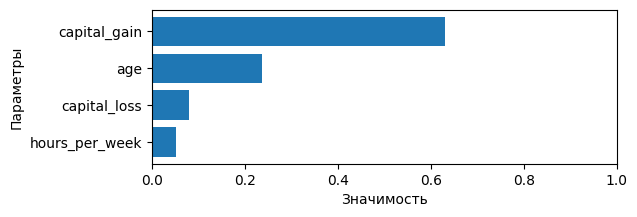

In [ ]:
#Рассмотрим наиболее значимые признаки
feature_importance = DT_clf.feature_importances_
sorted = np.argsort(feature_importance)
ypos = np.arange(len(features_names))
fig= plt.figure(figsize=(6,2))
plt.barh(ypos, feature_importance[sorted])
plt.xlim([0,1])
plt.ylabel('Параметры')
plt.xlabel('Значимость')
plt.yticks(ypos,features_names[sorted] );

Выводы по модели:
*   в сравнении с логистической регрессией в тех же условиях (числовые признаки) модель деревьев решений показывает метрики немного лучше (accuracy 0.87 против 0.85 и метрика f1 0.92 против 0.91)
*   признак связанный с накопленным капиталом является самым значимым
*   признак возраста тоже значим хоть и немного
*   остальные признаки менее значимы

## Оценим влияние категориальных признаков

In [ ]:
X = DF.drop(columns = ['income'])
y = DF['income']
features_names = DF.drop(columns = ['income']).columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#@title Гиперпараметры Деревьев Решений{ run: "auto" }
#@markdown ### Максимальное число листьев
max_leaf_nodes = 20 #@param {type:"slider", min:10, max:50, step:10}
#@markdown ### Минимальное число объектов для разбиения
min_samples_split = 20 #@param {type:"slider", min:10, max:100, step:10}
#@markdown ### критерий разбиения
criterion = 'entropy' #@param ['gini', 'entropy', 'log_loss']{type:"string"}



DT_clf=DecisionTreeClassifier(criterion = criterion,
                              min_samples_split=min_samples_split,
                              max_leaf_nodes=max_leaf_nodes)

DT_clf.fit(X_train, y_train)

y_predict=DT_clf.predict(X_test)

scoring = {'ACC': 'accuracy',
           'F1': 'f1',
           'Precision': 'precision',
           'Recall': 'recall'}

cross_validation (X_train, y_train,
                  DT_clf,
                  scoring,
                  StratifiedKFold(n_splits=5)
                  )

print (classification_report(y_test,
                             y_predict,
                             target_names=['low','high']
                             )
)

Ошибка на кросс-валидации


,fit_time,score_time,test_ACC,test_F1,test_Precision,test_Recall
0,0.017334,0.009843,0.884038,0.928511,0.903930,0.954467
1,0.013871,0.010719,0.879945,0.926707,0.893948,0.961960
2,0.013700,0.009392,0.890810,0.932923,0.905589,0.961960
3,0.013874,0.009663,0.890810,0.931973,0.916388,0.948097
4,0.013744,0.009752,0.876251,0.924149,0.894708,0.955594




test_ACC          0.884371
test_F1           0.928853
test_Precision    0.902913
test_Recall       0.956415
dtype: float64
              precision    recall  f1-score   support

         low       0.74      0.63      0.68       984
        high       0.91      0.94      0.92      3727

    accuracy                           0.88      4711
   macro avg       0.82      0.79      0.80      4711
weighted avg       0.87      0.88      0.87      4711



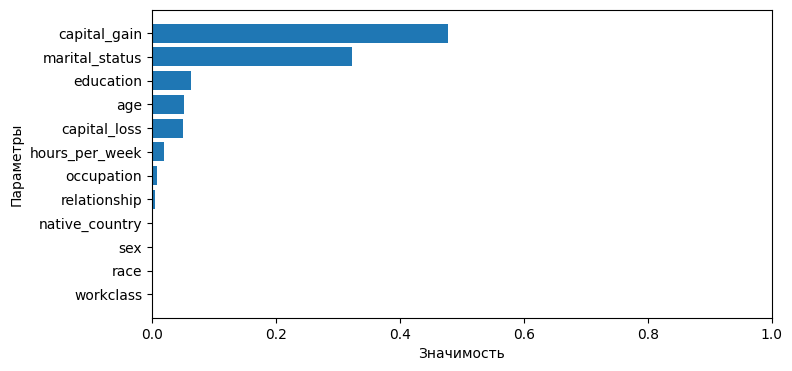

In [ ]:
feature_importance = DT_clf.feature_importances_
sorted = np.argsort(feature_importance)
ypos = np.arange(len(features_names))
fig= plt.figure(figsize=(8,4))
plt.barh(ypos, feature_importance[sorted])
plt.xlim([0,1])
plt.ylabel('Параметры')
plt.xlabel('Значимость')
plt.yticks(ypos,features_names[sorted] );

Выводы по модели:

*  в сравнении с логистической регрессией в тех же условиях (все признаки) модель деревьев решений показывает метрики немного лучше (accuracy 0.8843 против 0.883 и метрика f1 0.9289 против 0.9275)
* в сравнении с использованием только числовых признаков (в деревьях решений) модель с использованием всех признаков показывает метрики немного лучше (accuracy 0.88 против 0.87 и метрика f1 0.9289 против 0.9272)
* признаки, связанные с накопленным капиталом и со статусом брака, являются самыми значимыми
* признаки, связанные с образованием, возрастом и потерянным капиталом, являются менее значимыми
* остальные признаки почти незначимые
* родной город, пол, раса и рабочий класс бесполезные признаки

# Попробуем улучшить модель

В основном игрался с количеством листьев и разделений

In [ ]:
X = DF.drop(columns = ['income'])
y = DF['income']
features_names = DF.drop(columns = ['income']).columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#@title Гиперпараметры Деревьев Решений{ run: "auto" }
#@markdown ### Максимальное число листьев
max_leaf_nodes = 50 #@param {type:"slider", min:10, max:50, step:10}
#@markdown ### Минимальное число объектов для разбиения
min_samples_split = 80 #@param {type:"slider", min:10, max:100, step:10}
#@markdown ### критерий разбиения
criterion = 'entropy' #@param ['gini', 'entropy', 'log_loss']{type:"string"}



DT_clf=DecisionTreeClassifier(criterion = criterion,
                              min_samples_split=min_samples_split,
                              max_leaf_nodes=max_leaf_nodes)

DT_clf.fit(X_train, y_train)

y_predict=DT_clf.predict(X_test)

scoring = {'ACC': 'accuracy',
           'F1': 'f1',
           'Precision': 'precision',
           'Recall': 'recall'}

cross_validation (X_train, y_train,
                  DT_clf,
                  scoring,
                  StratifiedKFold(n_splits=5)
                  )

print (classification_report(y_test,
                             y_predict,
                             target_names=['low','high']
                             )
)

Ошибка на кросс-валидации


,fit_time,score_time,test_ACC,test_F1,test_Precision,test_Recall
0,0.017062,0.009733,0.885857,0.930181,0.898925,0.963689
1,0.017430,0.009725,0.884038,0.928671,0.902174,0.956772
2,0.016384,0.012722,0.893085,0.933896,0.912088,0.956772
3,0.018921,0.009908,0.900364,0.938362,0.916438,0.961361
4,0.016043,0.009525,0.890355,0.932322,0.908593,0.957324




test_ACC          0.890740
test_F1           0.932686
test_Precision    0.907643
test_Recall       0.959184
dtype: float64
              precision    recall  f1-score   support

         low       0.81      0.57      0.67       984
        high       0.89      0.97      0.93      3727

    accuracy                           0.88      4711
   macro avg       0.85      0.77      0.80      4711
weighted avg       0.88      0.88      0.87      4711



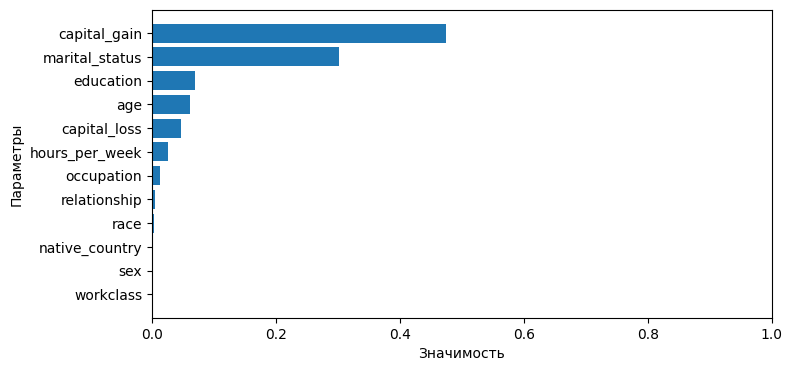

In [ ]:
feature_importance = DT_clf.feature_importances_
sorted = np.argsort(feature_importance)
ypos = np.arange(len(features_names))
fig= plt.figure(figsize=(8,4))
plt.barh(ypos, feature_importance[sorted])
plt.xlim([0,1])
plt.ylabel('Параметры')
plt.xlabel('Значимость')
plt.yticks(ypos,features_names[sorted] );

Выводы по модели:
*  увеличение количество листьев и разделений улучшило метрики модели хоть и не намного (accuracy 0.89 против 0.88 и f1 0.93 против 0.92)
*  самые значимые признаки остались те же (накопленный капитал и статус в брака)
*  остальные признаки остались менее значимы, но их значимость немного выросла
*  родной город, пол и рабочий класс остались бесполезными признаками